In [1]:
#importing packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
#reading the data
df = pd.read_excel(r'C:\Users\Lenovo\SSN Study Materials\Processed Dataset\Water Portability Dataset Outliers Treated.xlsx')

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


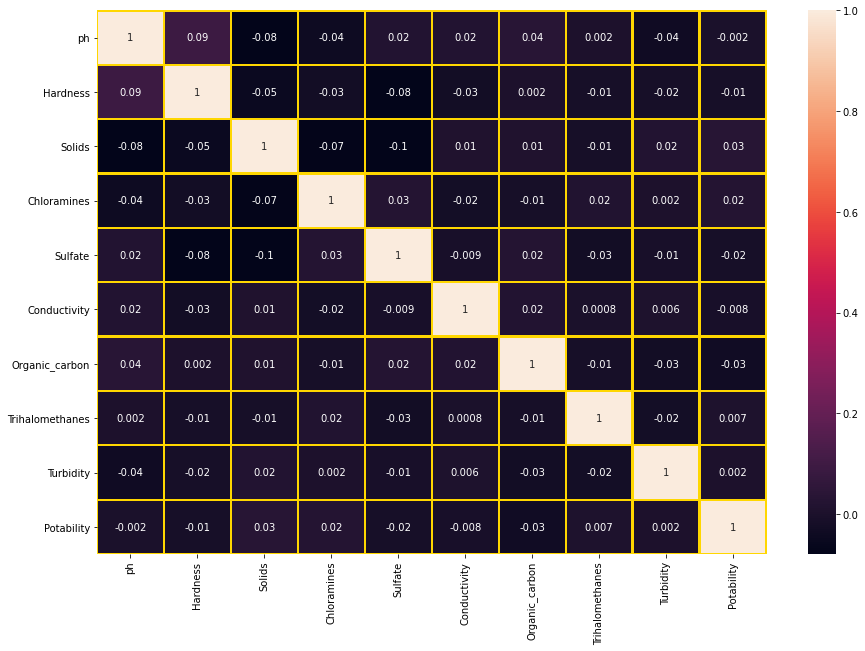

In [5]:
#Correlation Matrix
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

In [6]:
#Splitting the X and y values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.88910696e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
#Test, Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree

In [11]:
#Fitting the model to Decision Tree
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier(random_state=150)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
score_model1 =accuracy_score(y_test,y_pred)
print(score_model1)

0.6164801627670397


In [13]:
report_model1=classification_report(y_test,y_pred)
print(report_model1)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       610
           1       0.49      0.49      0.49       373

    accuracy                           0.62       983
   macro avg       0.59      0.59      0.59       983
weighted avg       0.62      0.62      0.62       983



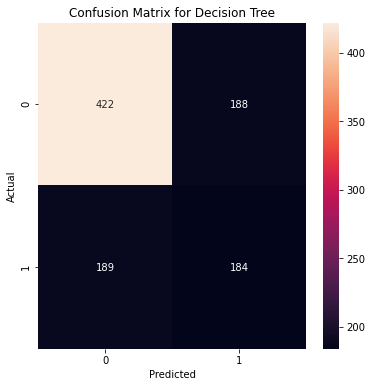

In [14]:
conf_mat1=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Random Forest

In [15]:
#Fitting the model to Random Forest
regressor2 = RandomForestClassifier(random_state=400)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)

In [16]:
score_model2 =accuracy_score(y_test,y_pred2)
print(score_model2)

0.6927772126144456


In [17]:
report_model2=classification_report(y_test,y_pred2)
print(report_model2)

              precision    recall  f1-score   support

           0       0.70      0.90      0.78       610
           1       0.68      0.36      0.47       373

    accuracy                           0.69       983
   macro avg       0.69      0.63      0.63       983
weighted avg       0.69      0.69      0.67       983



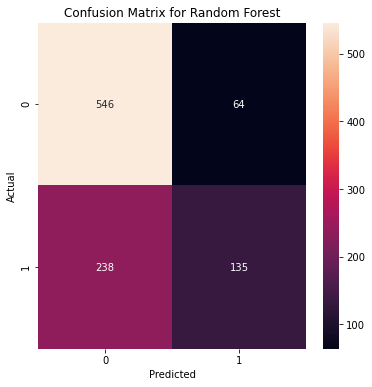

In [18]:
conf_mat2=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# SVM

In [19]:
#Fitting the model to SVM
regressor3 = SVC(random_state=400)
regressor3.fit(X_train, y_train)
y_pred3 = regressor3.predict(X_test)

In [20]:
score_model3 =accuracy_score(y_test,y_pred3)
print(score_model3)

0.6724313326551373


In [21]:
report_model3=classification_report(y_test,y_pred3)
print(report_model3)

              precision    recall  f1-score   support

           0       0.67      0.91      0.78       610
           1       0.66      0.28      0.39       373

    accuracy                           0.67       983
   macro avg       0.67      0.60      0.58       983
weighted avg       0.67      0.67      0.63       983



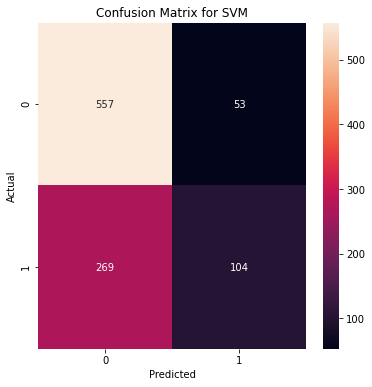

In [22]:
conf_mat3=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for SVM")
plt.show()

# Naive Bayes 

In [23]:
#Fitting the model to Naive Bayes
regressor4 = GaussianNB()
regressor4.fit(X_train, y_train)
y_pred4 = regressor4.predict(X_test)

In [24]:
score_model4 =accuracy_score(y_test,y_pred4)
print(score_model4)

0.6083418107833164


In [25]:
report_model4=classification_report(y_test,y_pred4)
print(report_model4)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       610
           1       0.46      0.20      0.28       373

    accuracy                           0.61       983
   macro avg       0.55      0.53      0.50       983
weighted avg       0.57      0.61      0.56       983



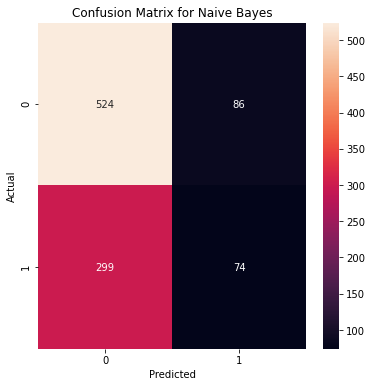

In [26]:
conf_mat4=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

# KNN

In [27]:
#Fitting the model to KNN
regressor5 = KNeighborsClassifier(n_neighbors=53)
regressor5.fit(X_train, y_train)
y_pred5 = regressor5.predict(X_test)

In [28]:
score_model5 =accuracy_score(y_test,y_pred5)
print(score_model5)

0.659206510681587


In [29]:
report_model5=classification_report(y_test,y_pred5)
print(report_model5)

              precision    recall  f1-score   support

           0       0.65      0.96      0.78       610
           1       0.72      0.17      0.27       373

    accuracy                           0.66       983
   macro avg       0.68      0.56      0.53       983
weighted avg       0.68      0.66      0.59       983



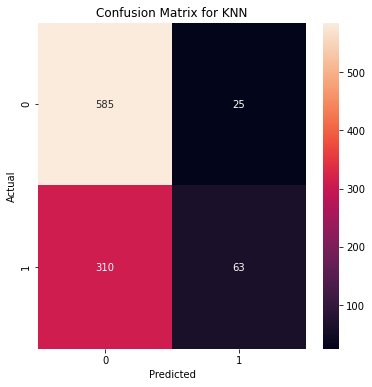

In [30]:
conf_mat5=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat5,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for KNN")
plt.show()

# Logistic Regression

In [31]:
#Fitting the model to Logistic Regression
regressor6 = LogisticRegression(random_state=10)
regressor6.fit(X_train, y_train)
y_pred6 = regressor6.predict(X_test)

In [32]:
score_model6 =accuracy_score(y_test,y_pred6)
print(score_model6)

0.6215666327568667


In [33]:
report_model6=classification_report(y_test,y_pred6)
print(report_model6)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       1.00      0.00      0.01       373

    accuracy                           0.62       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.76      0.62      0.48       983



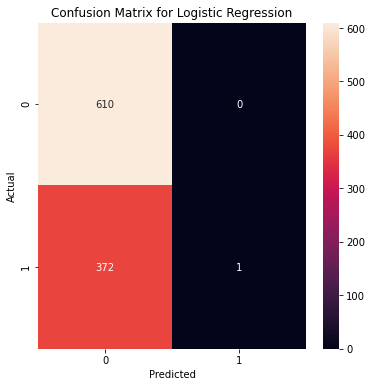

In [34]:
conf_mat6=confusion_matrix(y_test,y_pred6)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat6,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Text(0, 0.5, 'Algorithm Scores')

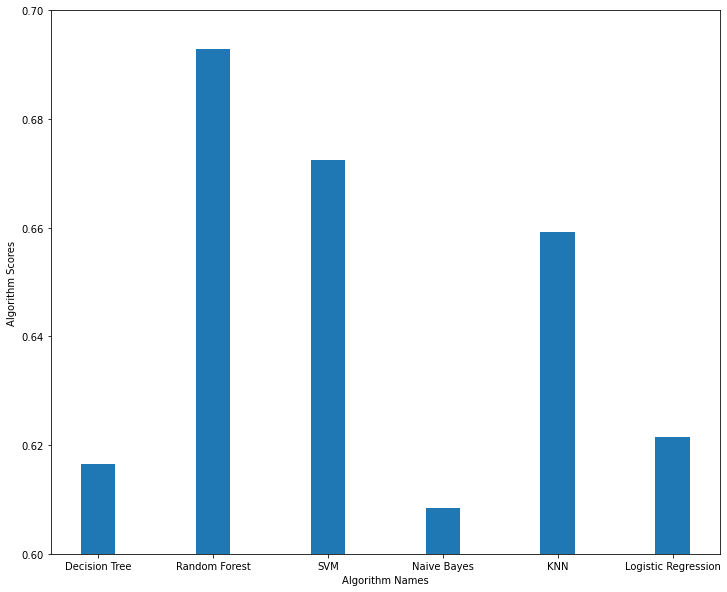

In [35]:
# Comparison Graph for used algorithms 
algo_names=['Decision Tree','Random Forest','SVM','Naive Bayes','KNN','Logistic Regression']
algo_scores=(score_model1,score_model2,score_model3,score_model4,score_model5,score_model6)
plt.figure(figsize=(12,10))
plt.ylim([0.60,0.70])
plt.bar(algo_names,algo_scores,width=0.3)
plt.xlabel('Algorithm Names')
plt.ylabel('Algorithm Scores')